<a href="https://colab.research.google.com/github/travissalascox/cronkite/blob/master/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1:
Set random seed = 42. Generate a sample of 500 observations of the following random variables: <br>
$X = 2 + u$, where $u$ is the random float in the range (0,2). <br>
$Z = 3 - e$, where $e$ is the random number drawn from the standard normal distribution. <br>
$Y = 5 + 2X + Z + o$, where $o$ is the random noise in the range (0,1). <br>
Estimate the model: $Y = 5 + 2X + Z + o$


In [ ]:
import numpy as np
np.random.seed(42)
# multiple the random sample by 2 so that the interval is from (0,2) rather than (0,1)
X = 2 + 2*np.random.rand(500, 1)
# use randn to generate based on standard normal dist
Z = 3 - np.random.randn(500, 1)
Y = 5 + 2*X + Z + np.random.rand(500, 1)

In [ ]:
# Estimate the model using LinearRegression since the data set is not too large
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
features = np.c_[X, Z]
lin_reg.fit(features, Y)
print('Estimated Intercept {int}'.format(int=lin_reg.intercept_[0]))
for index, feature in enumerate(['X', 'Z']):
    print('Slope Coefficient {coef} for feature {feat}'.format(
            coef=lin_reg.coef_[0][index],
            feat=feature
        )
    )

Estimated Intercept 5.443752333369236
Slope Coefficient 2.021358103523118 for feature X
Slope Coefficient 0.9996344726557272 for feature Z


In [ ]:
# using matrices
# add ones to solve for intercept
features_b = np.c_[np.ones((500, 1)), features]
theta_best = np.linalg.inv(features_b.T.dot(features_b)).dot(features_b.T).dot(Y)
print('Solution vector from matrix multplication\n{sol}'.format(sol=theta_best))

Solution vector from matrix multplication
[[5.44375233]
 [2.0213581 ]
 [0.99963447]]


# Problem 2: 
Estimate the model from problem 1 Batch Gradient Descent (BGD) with eta = 0.3, 100 iterations, and 300 observations.
Set starting theta at random number with mean 3 and sd = 1. <br>
Print a graph of MSE and iterations.
 What do you think is the problem? Is MSE is getting smaller or bigger with each iteration?

In [24]:
from sklearn.metrics import mean_squared_error
eta = 0.3
n_iterations = 100
m = 300

np.random.seed(42)

# redine variables with 300 observations
X = 2 + 2*np.random.rand(m, 1)
Z = 3 - np.random.randn(m, 1)
Y = 5 + 2*X + Z + np.random.rand(m, 1)
features = np.c_[X, Z]
features_b = np.c_[np.ones((m, 1)), features]

# randomly set theta using standard normal dist
# should have a shape of 3X1 since there are two features
# and an intercept. The standard normal dist is used to give
# the sd = 1 requested. The result has three added to it so that
# the mean, the center of the standard normal dist, is moved to 3
theta = 3 + np.random.randn(3, 1)

mse = []
for iteration in range(n_iterations):
    # calculate MSE at each interation to use in the second part of the problem
    mse.append(mean_squared_error(Y, features_b.dot(theta)))
    # calculate the gradient and find the new theta
    gradients = 2/m*features_b.T.dot(features_b.dot(theta) - Y)
    theta += -eta*gradients

print('Solution vector from BGD\n{sol}'.format(sol=theta_best))

Solution vector from BGD
[[5.4997669 ]
 [2.00004172]
 [1.0000495 ]]


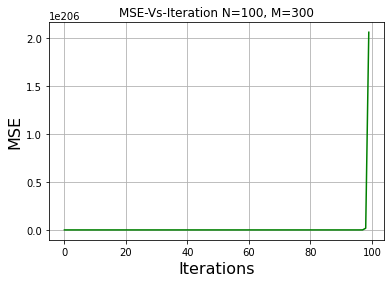

In [25]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(range(n_iterations), mse, 'g-')
plt.xlabel("Iterations", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.grid(True)
plt.title("MSE-Vs-Iteration N=100, M=300")
plt.show()

The fit is getting exponentially worse as we iterate. At the end, the MSE is of the order 5*10^206. Which is massive

# Problem 3 
Let's try two ways to fix the problem. <br>
3.A Find smaller eta to reduce MSE. Search from 0.001 to 0.1, using a step of 0.001. What is the optimal eta? What is the MSE with the optimal eta? Plot the graph of eta and MSE around the optimal eta (+5,-5 observations). 


In [26]:
# keeping m=300 and n=100
mse = []
etas = np.arange(0.001, 0.1, 0.001)
for eta in etas:
    # assuming same starting theta as in problem 2
    # reset for each run
    theta = 3 + np.random.randn(3, 1)
    for iteration in range(n_iterations):
        # calculate the gradient and find the new theta
        gradients = 2/m*features_b.T.dot(features_b.dot(theta) - Y)
        theta += -eta*gradients
    # calculate MSE after final interation per eta. We will try to
    # minimize this value later
    mse.append(mean_squared_error(Y, features_b.dot(theta)))

In [27]:
from numpy import argmin

min_index = argmin(mse)
min_mse = mse[min_index]
min_eta = etas[min_index]
print(mse)
print('Minimum MSE: {mse} found at {index}'.format(mse=min_mse, index=min_index))
print('Eta: {eta} found at {index}'.format(eta=min_eta, index=min_index))

[1.3416186586937495, 0.4281733929605833, 0.18880277978532778, 0.40780753994857233, 1.5420893763511092, 0.2927302019480039, 0.25212796945594607, 0.27380767934997285, 0.2827427880454319, 0.1815998287767041, 0.33026250009015773, 0.21566855953498057, 0.1957294393891317, 0.39419814853141644, 0.31937144854325056, 0.10304722621224423, 0.21688979868848543, 0.3258729972999413, 0.22437830108539109, 0.13339781313169344, 0.14560138457434188, 0.2118243881984947, 0.08051655742855614, 0.25714986920995275, 0.137498830557837, 0.3078982197027212, 0.14837458450283816, 0.12017701493971444, 0.25372708611143313, 0.18614194196661352, 0.2420724490614565, 0.2411833462563639, 0.18931013390138426, 0.07993725461076671, 0.14318999838325044, 0.1492068218038815, 0.13288904061160242, 0.14462162650648386, 0.14347186410306192, 0.10709007154442046, 0.23717137423847778, 0.16676731911403392, 0.15868620691768484, 0.2204520900288304, 0.09833592186468675, 0.14364788383095398, 0.18239842385179145, 0.16920658605417624, 0.31980

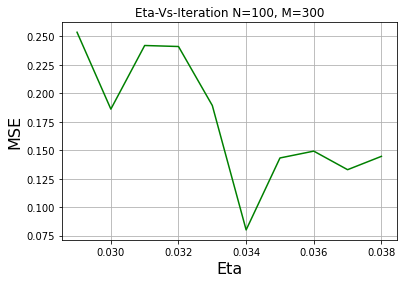

In [28]:
plt.plot(etas[min_index-5:min_index+5], mse[min_index-5:min_index+5], 'g-')
plt.xlabel("Eta", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.grid(True)
plt.title("Eta-Vs-Iteration N=100, M=300")
plt.show()

# Problem 4:
Let's try to fix the model fit in Problem 2 by using optimal early stopping. At what iteration should we stop to minimize MSE? What is the value of MSE at this step? Compare our MSE with the one from Problem 3.  

In [29]:
np.random.seed(42)

eta = 0.3

theta = 3 + np.random.randn(3, 1)

mse = []
for iteration in range(n_iterations):
    # calculate MSE at each interation to use in the second part of the problem
    mse.append(mean_squared_error(Y, features_b.dot(theta)))
    # calculate the gradient and find the new theta
    gradients = 2/m*features_b.T.dot(features_b.dot(theta) - Y)
    theta += -eta*gradients

min_index = argmin(mse)
min_mse = mse[min_index]
print(mse)
print('Minimum MSE: {mse} found at {index}'.format(mse=min_mse, index=min_index))

[80.3185665065726, 9124.080882428381, 1058647.020575917, 122841655.8392009, 14254115928.010555, 1653997741146.1716, 191924111012605.53, 2.2270202353757424e+16, 2.584156363994978e+18, 2.998564632462377e+20, 3.4794294882195093e+22, 4.037408242739747e+24, 4.6848672673876174e+26, 5.436156066830203e+28, 6.307925304234612e+30, 7.319495826580398e+32, 8.493286868720858e+34, 9.855312926394185e+36, 1.143576031028142e+39, 1.3269656159163244e+41, 1.5397644739380332e+43, 1.7866888235566544e+45, 2.073211199669963e+47, 2.4056817403048347e+49, 2.7914689234542935e+51, 3.2391228731792562e+53, 3.758564854295372e+55, 4.361307155377735e+57, 5.060708233306502e+59, 5.872268774070804e+61, 6.813975231367287e+63, 7.906698456770438e+65, 9.174656256235261e+67, 1.0645950124479476e+70, 1.2353188052781716e+72, 1.433420721336042e+74, 1.6632912537042272e+76, 1.930024976944932e+78, 2.23953345713539e+80, 2.5986762687226566e+82, 3.015413021898006e+84, 3.498979769843151e+86, 4.060093705526802e+88, 4.711190684705582e+90, 5

This MSE is much larger than what was found for problem 3. This would suggest that it is better to try and find an optimal eta than to stop iterations for a given eta

# Problem 5:

To solve this problem we need to learn how to time the how long it takes to run our code:

Create create Y, X, and Z samples from problem 1 with 100,000,000 observations (100 million). Measure how long does it take to estimate linear regression of Y on X and Z using: Stochastic Gradient Descent, Batch Gradient Descent, Linear Regression from sklearn, and Linear regression estimated using matrix multiplication $$\hat{\theta} = (\pmb{X}^T \cdot \pmb{X})^{-1} \cdot \pmb{X}^T \cdot \pmb{y}$$, and Linear regression estimated preudo-inverse. For Batch Gradient Descent use 1000 iterations and eta = 0.01. For Stochastic Gradient Descent use 5 iterations and eta = 0.01. Use SGDRegressior imported from sklearn.model.

For each estimation import **MSE** and **time**

In [4]:
import numpy as np
np.random.seed(42)
N = 100000000

X = 2 + 2*np.random.rand(N, 1)
Z = 3 - np.random.randn(N, 1)
Y = 5 + 2*X + Z + np.random.rand(N, 1)
features = np.c_[X, Z]

In [19]:
import time
from sklearn.metrics import mean_squared_error
from numpy import argmin

In [8]:
from sklearn.linear_model import LinearRegression 
# using Linear Regression
lin_reg = LinearRegression()
now = time.time()
lin_reg.fit(features, Y)
done = time.time()
y_predict = lin_reg.predict(features)
print('Time difference {delta} seconds'.format(delta=(done-now)))
print('MSE = {mse}'.format(mse=mean_squared_error(Y, y_predict)))

Time difference 8.25083875656128 seconds
MSE = 0.0833251277099018


In [9]:
# using matrix multiplication
features_b = np.c_[np.ones((N, 1)), features]
now = time.time()
theta_best = np.linalg.inv(features_b.T.dot(features_b)).dot(features_b.T).dot(Y)
done = time.time()
print('Time difference {delta} seconds'.format(delta=(done-now)))
print('MSE = {mse}'.format(mse=mean_squared_error(Y, features_b.dot(theta_best))))

Time difference 5.952147722244263 seconds
MSE = 0.08332512770990155


In [20]:
# using batch gradient descent. Using the version from problem 3
np.random.seed(42)

theta = 3 + np.random.randn(3, 1)
eta = 0.01
n_iterations = 1000

mse = []
now = time.time()

# assuming same starting theta as in problem 2
# reset for each run
theta = 3 + np.random.randn(3, 1)
for iteration in range(n_iterations):
    # calculate the gradient and find the new theta
    gradients = 2/N*features_b.T.dot(features_b.dot(theta) - Y)
    theta += -eta*gradients
    # calculate MSE after final interation per eta. We will try to
    # minimize this value later.
    mse.append(mean_squared_error(Y, features_b.dot(theta)))

done = time.time()
print('Time difference {delta} seconds'.format(delta=(done-now)))
min_index = argmin(mse)
min_mse = mse[min_index]
print('Minimum MSE: {mse} found at {index}'.format(mse=min_mse, index=min_index))

Time difference 1870.8642578125 seconds
Minimum MSE: 0.09796572178997225 found at 999


In [10]:
from sklearn.linear_model import SGDRegressor
# using SGD
sgd_reg = SGDRegressor(max_iter=5, eta0=0.01, random_state=42)
now = time.time()
sgd_reg.fit(features, Y.ravel())
done = time.time()
y_predict = sgd_reg.predict(features)
print('Time difference {delta} seconds'.format(delta=(done-now)))
print('MSE = {mse}'.format(mse=mean_squared_error(Y, y_predict)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Time difference 189.30756974220276 seconds
MSE = 0.08333383344989162


In [16]:
# using p-inverse matrix multiplication
now = time.time()
theta_best = np.linalg.pinv(features_b.T.dot(features_b)).dot(features_b.T).dot(Y)
done = time.time()
print('Time difference {delta} seconds'.format(delta=(done-now)))
print('MSE = {mse}'.format(mse=mean_squared_error(Y, features_b.dot(theta_best))))

Time difference 3.0571765899658203 seconds
MSE = 0.08332512770990151


# Problem 6
Recreate a X,Y data from problem 1 using 500 observations. Create a 25-degree polynomial for X and scale the data using standard scaler. Estimate the regression model predicting Y via Ridge regression. Calculate MSE (average 'neg_mean_squared_error') using cross-validation with cv = 3. Find optimal alpha by looping from 0.0001 to 1 using step size 0.0001.

In [3]:
import numpy as np
np.random.seed(42)

X = 2 + 2*np.random.rand(500, 1)
# assuming from the definition of the problem above that Z is no longer used
Y = 5 + 2*X + np.random.rand(500, 1)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# create pipeline to transform the data
# assuming we also have include_bias set to False as in the book
# since the default is True 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
feature_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('std_scaler', StandardScaler()),
])

X_transformed = feature_pipeline.fit_transform(X)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from numpy import argmin

mse = []
# scoring based on https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
alphas = np.arange(0.0001, 1, 0.0001)
for alpha in alphas:
    # using the default auto solver to let the data
    # set what the solver should be
    ridge_reg = Ridge(alpha)
    # take the mean of the three folds
    mse.append(cross_val_score(ridge_reg, X_transformed, Y, cv=3, scoring='neg_mean_squared_error').mean())

In [25]:
from numpy import argmin

min_index = argmin(mse)
min_mse = mse[min_index]
min_alpha = alphas[min_index]
print(mse)
print('Minimum MSE: {mse} found at {index}'.format(mse=min_mse, index=min_index))
print('Alpha: {alpha} found at {index}'.format(alpha=min_alpha, index=min_index))

[-0.08334695321726014, -0.08324338089758096, -0.08318629895350999, -0.08314591418324106, -0.08311460254280612, -0.08308917076975982, -0.08306791212145291, -0.08304977934194425, -0.0830340729326974, -0.0830202987575688, -0.08300809371771561, -0.082997183067706, -0.08298735412104556, -0.0829784391734185, -0.08297030394984484, -0.08296283953215199, -0.0829559565678916, -0.08294958102458262, -0.0829436510186944, -0.08293811440970049, -0.08293292694892153, -0.08292805083780404, -0.08292345359271293, -0.08291910714213326, -0.08291498710242033, -0.08291107219179021, -0.08290734375281263, -0.08290378536043794, -0.082900382498229, -0.08289712228933645, -0.08289399327163767, -0.0828909852088869, -0.08288808893125127, -0.08288529620006768, -0.0828825995926373, -0.08287999240367065, -0.08287746856064905, -0.08287502255087065, -0.08287264935832522, -0.08287034440891206, -0.08286810352274773, -0.08286592287246743, -0.08286379894675178, -0.08286172851822171, -0.0828597086152072, -0.08285773649679423,

# Problem 7: 
Repeat the problem 6 using Lasso regression. In addition to MSE and alpha, report how many coefficients are equal to zero in the optimal model.    

In [26]:
from sklearn.linear_model import Lasso

mse = []
for alpha in alphas:
    # using the default auto solver to let the data
    # set what the solver should be
    lasso_reg = Lasso(alpha)
    # take the mean of the three folds
    mse.append(cross_val_score(lasso_reg, X_transformed, Y, cv=3, scoring='neg_mean_squared_error').mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37375213476132174, tolerance: 0.051181840238714305
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0090404096073016, tolerance: 0.04916478441414916
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10696790792873045, tolerance: 0.04916478441414916
  positive)


In [27]:
from numpy import argmin

min_index = argmin(mse)
min_mse = mse[min_index]
min_alpha = alphas[min_index]
print(mse)
print('Minimum MSE: {mse} found at {index}'.format(mse=min_mse, index=min_index))
print('Alpha: {alpha} found at {index}'.format(alpha=min_alpha, index=min_index))

[-0.0823524458709247, -0.08223490255074438, -0.08215833289807052, -0.08211239262292809, -0.08209324222288517, -0.08207776690902745, -0.08206847193677125, -0.08206429750835069, -0.08205607225470513, -0.08205131296697958, -0.08204617630437198, -0.08204118215875812, -0.0820424982510114, -0.08204765392356758, -0.08205168390181028, -0.08205492871783684, -0.08205769885291211, -0.08206609995573738, -0.0820712129143057, -0.08207561100966314, -0.08208076837087029, -0.08208617322930312, -0.08209040022728607, -0.08209225845449312, -0.08209388252628547, -0.08209509765230365, -0.08209563269283449, -0.08209736842658058, -0.08209903101045314, -0.08210009787761856, -0.08210136737852547, -0.08210361707077439, -0.08210488809681252, -0.08210620307430051, -0.08210806052535562, -0.08210983139541796, -0.08211201890481844, -0.08211419111657912, -0.08211633205783095, -0.08211693818837569, -0.08211723928984734, -0.0821176088530243, -0.0821180665264498, -0.08211871392390435, -0.082119289602528, -0.0821199197963

In [28]:
# since we don't save the results of the regression, will need to run it again
# with optimal alpha
lasso_reg = Lasso(min_alpha)
lasso_reg.fit(X_transformed, Y)
print('Total Number of coefficents equal to 0 is {coef}'.format(
      coef=np.count_nonzero(lasso_reg.coef_ == 0),
    )
)

Total Number of coefficents equal to 0 is 24
